# importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import string
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# reading the data set in the project

In [2]:
email=pd.read_csv('emails.csv')

In [3]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
email.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
email.shape

(5728, 2)

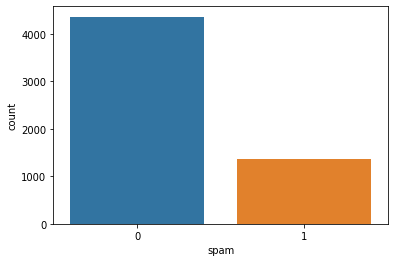

In [5]:
sns.countplot(x='spam',data=email)

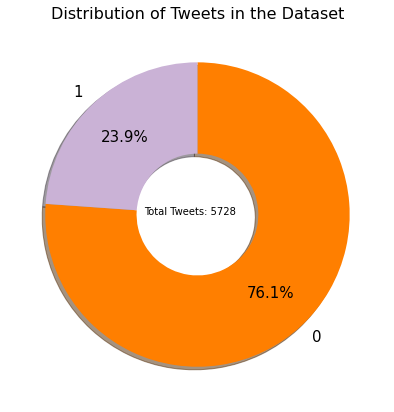

In [8]:

plt.figure(figsize = (7,7))
sorted_counts = email['spam'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(email.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

# removing duplicate rows if any


In [9]:
email.drop_duplicates(inplace=True)

In [10]:
email.shape

(5695, 2)

In [ ]:
nltk.download('stopwords')

# data cleaning/preprocessing


In [11]:
def process_data(text):
    no_punc=[char for char in text if char not in string.punctuation]
    no_punc=''.join(no_punc)
    
    clean_words=[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    return clean_words


In [12]:
email['text'].head().apply(process_data)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(email['text'],email['spam'],stratify=email['spam'],random_state=42,test_size=0.2)
X_train.shape

(4556,)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
count_vect=CountVectorizer()
X_train_counts=count_vect.fit_transform(X_train)
X_test_counts=count_vect.transform(X_test)


In [21]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train_counts,y_train)
lr_score=lr.score(X_test_counts,y_test)
print(lr_score)

0.9947322212467077


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_counts,y_train)
rf_score=rf.score(X_test_counts,y_test)
print(rf_score)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9569798068481123


In [16]:
from sklearn.naive_bayes import MultinomialNB
naive =MultinomialNB().fit(X_train_counts,y_train)
naive_score=naive.score(X_test_counts,y_test)
print(naive_score)

0.9929762949956101


In [17]:
from sklearn.svm import LinearSVC

svm=LinearSVC()
svm.fit(X_train_counts,y_train)
svm_score=svm.score(X_test_counts,y_test)
print(svm_score)

0.990342405618964


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train_counts,y_train)
xgb_score=xgb.score(X_test_counts,y_test)
print(xgb_score)

0.9692712906057945


In [26]:
visual_data=pd.DataFrame({'Algorithms':['Naive-Bayes','SVM','Logistic Regression','Random forest','Xgboost'],'Accuracy':[naive_score,svm_score,lr_score,rf_score,xgb_score]})
visual_data.head()

,Algorithms,Accuracy
0,Naive-Bayes,0.992976
1,SVM,0.990342
2,Logistic Regression,0.994732
3,Random forest,0.956980
4,Xgboost,0.969271


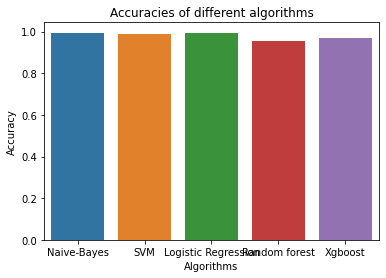

In [27]:
ax=ax = sns.barplot(x="Algorithms", y="Accuracy", data=visual_data)
plt.figure(1,figsize=(12,8))
plt.title('Accuracies of different algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
# plt.legend()
plt.show()

In [28]:
text='im mad at you bitch' # enter your text for testing
# get the prediction for the text
text_=count_vect.transform([text])
pred=lr.predict(text_)
prob=np.amax(lr.predict_proba(text_))#  p
print(pred,prob)

[0] 0.6777389918139625
